In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import itertools
import requests
import tempfile
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# Create an empty dataframe
data = pd.DataFrame(columns=['image_path', 'label'])

# Define the labels/classes

labels = {
    r"C:\Users\Tarun Singh\OneDrive\Desktop\Green Skill\Dataset\Satellite Image data\cloudy": "Cloudy",
    r"C:\Users\Tarun Singh\OneDrive\Desktop\Green Skill\Dataset\Satellite Image data\desert": "Desert",
    r"C:\Users\Tarun Singh\OneDrive\Desktop\Green Skill\Dataset\Satellite Image data\green_area": "Green_Area",
    r"C:\Users\Tarun Singh\OneDrive\Desktop\Green Skill\Dataset\Satellite Image data\water": "Water",
}

# Validate folder paths
for folder in labels:
    if not os.path.exists(folder):
        print(f"Warning: The folder {folder} does not exist.")
        continue

    # Process each image in the folder
    for image_name in os.listdir(folder):
        image_path = os.path.join(folder, image_name)
        if os.path.isfile(image_path):  # Only process files
            label = labels[folder]
            data = pd.concat([data, pd.DataFrame({'image_path': [image_path], 'label': [label]})], ignore_index=True)

# Display the resulting DataFrame
print(data)


                                             image_path   label
0     C:\Users\Tarun Singh\OneDrive\Desktop\Green Sk...  Cloudy
1     C:\Users\Tarun Singh\OneDrive\Desktop\Green Sk...  Cloudy
2     C:\Users\Tarun Singh\OneDrive\Desktop\Green Sk...  Cloudy
3     C:\Users\Tarun Singh\OneDrive\Desktop\Green Sk...  Cloudy
4     C:\Users\Tarun Singh\OneDrive\Desktop\Green Sk...  Cloudy
...                                                 ...     ...
2008  C:\Users\Tarun Singh\OneDrive\Desktop\Green Sk...   Water
2009  C:\Users\Tarun Singh\OneDrive\Desktop\Green Sk...   Water
2010  C:\Users\Tarun Singh\OneDrive\Desktop\Green Sk...   Water
2011  C:\Users\Tarun Singh\OneDrive\Desktop\Green Sk...   Water
2012  C:\Users\Tarun Singh\OneDrive\Desktop\Green Sk...   Water

[2013 rows x 2 columns]


In [3]:
data.to_csv(r"C:\Users\Tarun Singh\OneDrive\Desktop\Green Skill\Dataset\Satellite Image data/image_dataset.csv", index=False)

In [5]:
df = pd.read_csv(r"C:\Users\Tarun Singh\OneDrive\Desktop\Green Skill\Dataset\Satellite Image data/image_dataset.csv")

In [6]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   rotation_range=45,
                                   vertical_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    x_col="image_path",
                                                    y_col="label",
                                                    target_size=(255, 255),
                                                    batch_size=32,
                                                    class_mode="categorical")

test_generator = test_datagen.flow_from_dataframe(dataframe=test_df,
                                                  x_col="image_path",
                                                  y_col="label",
                                                  target_size=(255, 255),
                                                  batch_size=32,
                                                  class_mode="categorical")

Found 1610 validated image filenames belonging to 4 classes.
Found 403 validated image filenames belonging to 4 classes.


In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(255, 255, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\Tarun Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 253, 253, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,492 (56.61 MB)

 Trainable params: 14,839,492 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(train_generator, epochs=25, validation_data=test_generator)

c:\Users\Tarun Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 43s 805ms/step - accuracy: 0.4600 - loss: 1.6502 - val_accuracy: 0.6600 - val_loss: 0.5130
Epoch 2/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 42s 815ms/step - accuracy: 0.6420 - loss: 0.6254 - val_accuracy: 0.7816 - val_loss: 0.5259
Epoch 3/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 41s 795ms/step - accuracy: 0.6700 - loss: 0.5974 - val_accuracy: 0.7444 - val_loss: 0.5577
Epoch 4/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 40s 791ms/step - accuracy: 0.6428 - loss: 0.6335 - val_accuracy: 0.7469 - val_loss: 0.7354
Epoch 5/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 41s 793ms/step - accuracy: 0.7131 - loss: 0.5785 - val_accuracy: 0.6725 - val_loss: 0.5988
Epoch 6/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 41s 809ms/step - accuracy: 0.7213 - loss: 0.5311 - val_accuracy: 0.7742 - val_loss: 0.4703
Epoch 7/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 42s 822ms/step - accuracy: 0.7095 - loss: 0.5219 - val_accuracy: 0.7692 - val_loss: 0.4746
Epoch 8/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.7611 - loss: 0.4881 - val_accurac

In [11]:
num_samples = test_df.shape[0]
score = model.evaluate(test_generator, steps=num_samples//32+1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 190ms/step - accuracy: 0.8883 - loss: 0.3500


In [19]:
model.save("Classification_Satellite_Images_Modelenv.v1.h5")

In [21]:
model = load_model(r"C:\Users\Tarun Singh\OneDrive\Desktop\Green Skill\Classification_Satellite_Images_Modelenv.v1.h5")

In [22]:
class_names = ['Cloudy', 'Desert', 'Green_Area', 'Water']

In [23]:
def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [24]:
predictions = model.predict(test_generator)
actual_labels = test_generator.classes
predicted_labels = np.argmax(predictions, axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 223ms/step


In [25]:
cm = confusion_matrix(actual_labels, predicted_labels)

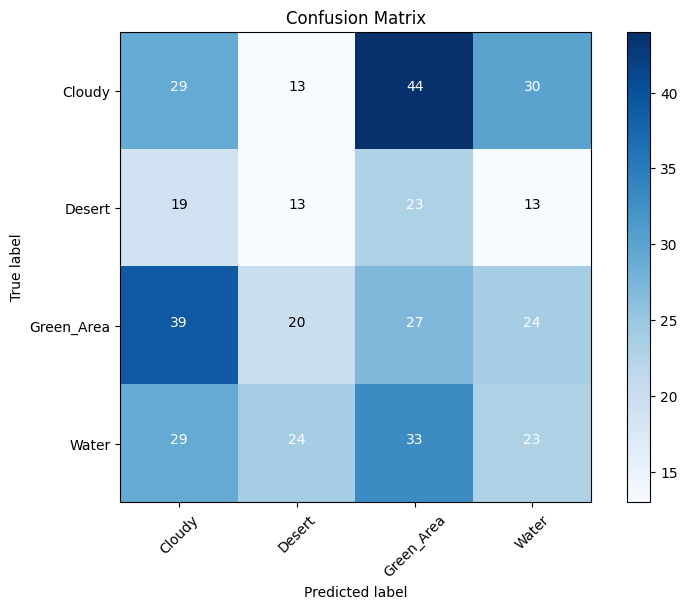

In [26]:
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=class_names)
plt.show()

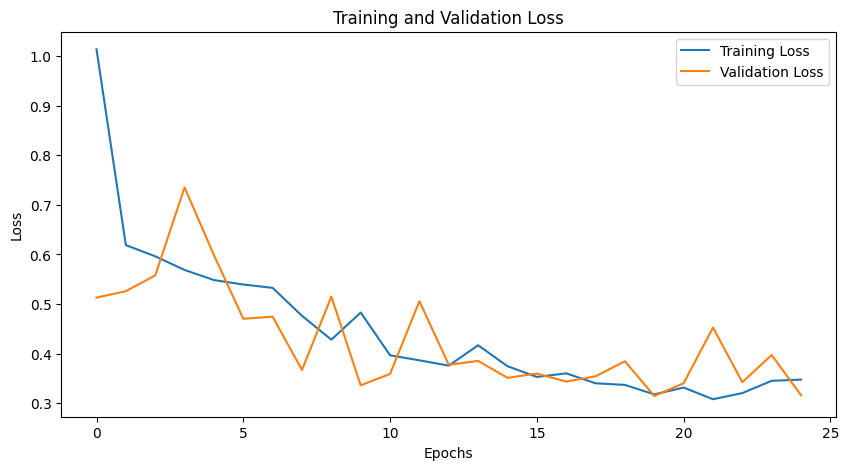

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

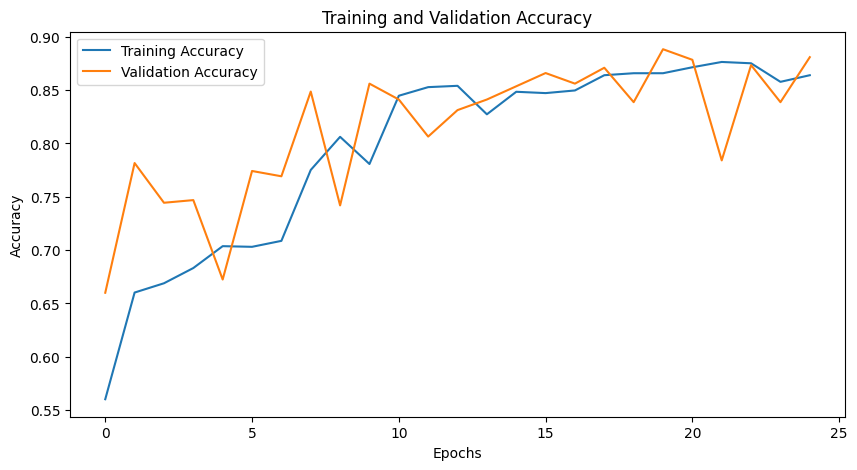

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()